In [65]:
import pandas as pd
import numpy as np

In [66]:
data = pd.read_csv("C:/Users/Admin/Downloads/Data Science - Material\EDA/data_clean (1).csv")

In [67]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [68]:
data=data.drop(["Unnamed: 0","Temp C"],axis=1)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [93]:
data=data.rename({'Solar.R':'Solar'},axis=1)

In [94]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['Weather']=data['Weather'].astype('category')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar    151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      158 non-null    int64   
 5   Year     158 non-null    int64   
 6   Temp     158 non-null    int64   
 7   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 9.0 KB


In [96]:
data[data.duplicated()].shape

(1, 8)

In [97]:
data[data.duplicated()]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [99]:
data=data.drop_duplicates()
data

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


<AxesSubplot:>

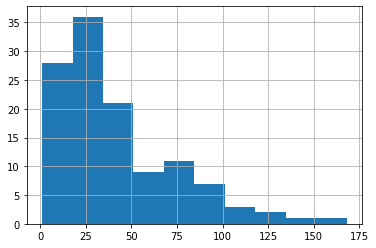

In [100]:
data['Ozone'].hist()

<AxesSubplot:>

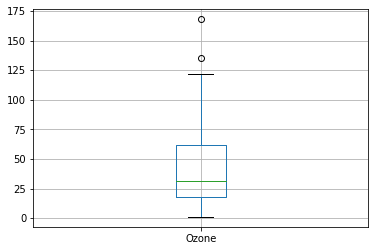

In [101]:
data.boxplot('Ozone')

In [102]:
data['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [103]:
mean=data['Ozone'].mean()
mean

41.81512605042017

<AxesSubplot:>

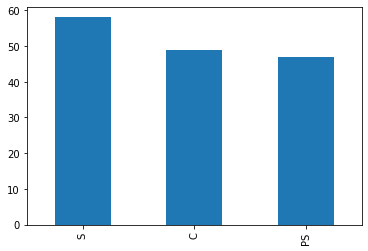

In [104]:
data['Weather'].value_counts().plot.bar()

In [160]:
import seaborn as sns

<AxesSubplot:>

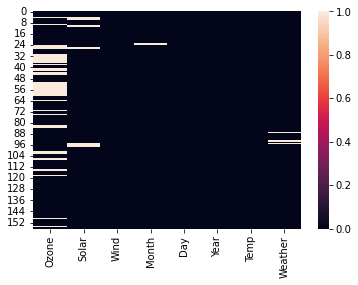

In [106]:
cols=data.columns
sns.heatmap(data[cols].isnull())

In [110]:
data[data.isnull().any (axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C


In [111]:
data.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [118]:
mean=data['Ozone'].mean()
print(mean)

41.81512605042017


In [120]:
data['Ozone']=data['Ozone'].fillna(mean)

In [121]:
data

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S


In [123]:
means=data['Solar'].mean()
print(means)

185.36666666666667


In [124]:
data['Solar'].describe()

count    150.000000
mean     185.366667
std       89.019146
min        7.000000
25%      118.500000
50%      199.000000
75%      257.500000
max      334.000000
Name: Solar, dtype: float64

In [125]:
data['Solar']=data['Solar'].fillna(means)

In [126]:
data

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S


In [127]:
wether=data[['Weather']]

In [129]:
wether.isnull().sum()

Weather    3
dtype: int64

In [134]:
wether=wether.fillna(wether.mode().iloc[0])

In [135]:
wether.isnull().sum()

Weather    0
dtype: int64

In [139]:
data1=pd.concat([data,wether],axis=1)

In [140]:
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,S


In [143]:
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

In [149]:
mean=data1['Month'].mean()
mean

7.032051282051282

In [150]:
data1['Month']=data1['Month'].fillna(mean)

In [155]:
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

In [158]:
data1.head(5)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S,S
1,36.0,118.0,8.0,5.0,2,2010,72,C,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,S


<AxesSubplot:>

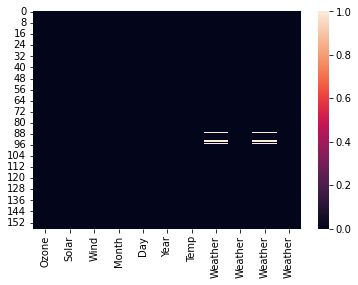

In [161]:
col=data1.columns
sns.heatmap(data1[col].isnull())

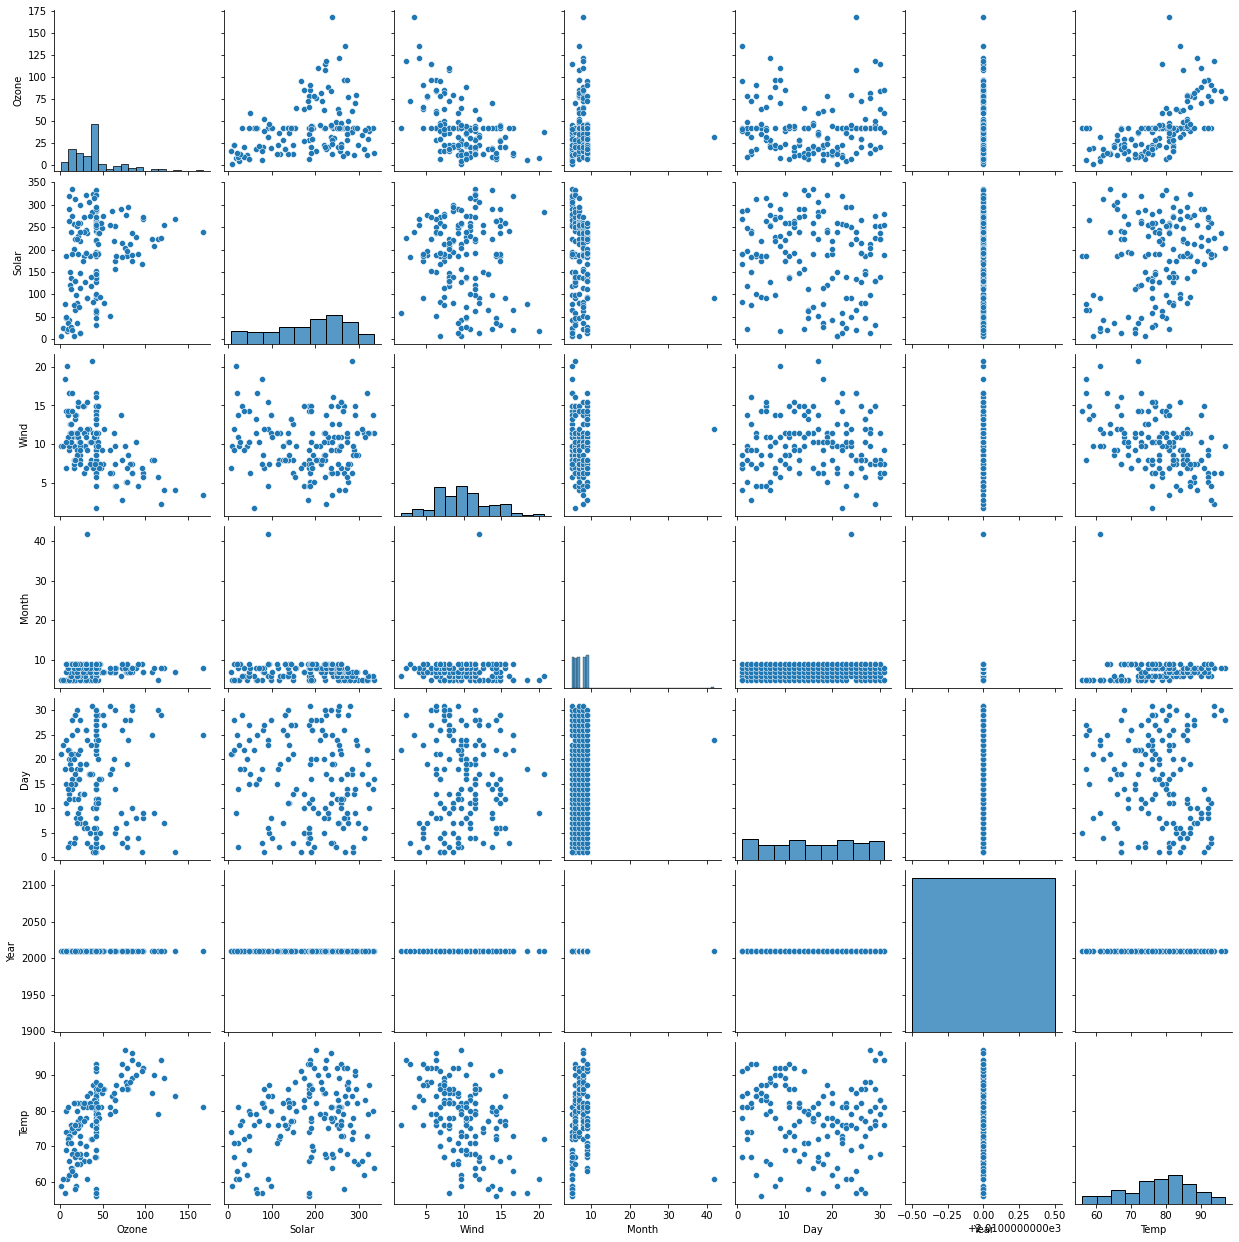

In [170]:
import seaborn as sns
sns.pairplot(data)

In [171]:
data.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304559,-0.520004,0.035964,-0.021916,NaN,0.606500
Solar,0.304559,1.000000,-0.055874,-0.118045,-0.151007,NaN,0.260677
Wind,-0.520004,-0.055874,1.000000,-0.033629,0.029900,NaN,-0.441228
Month,0.035964,-0.118045,-0.033629,1.000000,0.087055,NaN,0.052919
Day,-0.021916,-0.151007,0.029900,0.087055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,0.052919,-0.122787,NaN,1.000000


In [175]:
data1=pd.get_dummies(data,columns=['Weather'])

In [176]:
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.000000,7.4,5.0,1,2010,67,0,0,1
1,36.000000,118.000000,8.0,5.0,2,2010,72,1,0,0
2,12.000000,149.000000,12.6,5.0,3,2010,74,0,1,0
3,18.000000,313.000000,11.5,5.0,4,2010,62,0,0,1
4,41.815126,185.366667,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,0,0,1
153,41.000000,190.000000,7.4,5.0,1,2010,67,1,0,0
154,30.000000,193.000000,6.9,9.0,26,2010,70,0,1,0
155,41.815126,145.000000,13.2,9.0,27,2010,77,0,0,1


In [177]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler 

In [178]:
array=data1.values

In [179]:
array

array([[ 41.        , 190.        ,   7.4       , ...,   0.        ,
          0.        ,   1.        ],
       [ 36.        , 118.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ],
       [ 12.        , 149.        ,  12.6       , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 30.        , 193.        ,   6.9       , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.81512605, 145.        ,  13.2       , ...,   0.        ,
          0.        ,   1.        ],
       [ 18.        , 131.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ]])

In [182]:
scaler= MinMaxScaler()
scaler.fit_transform(array[:,0:5])

array([[0.23952096, 0.55963303, 0.3       , 0.        , 0.        ],
       [0.20958084, 0.33944954, 0.33157895, 0.        , 0.03333333],
       [0.06586826, 0.43425076, 0.57368421, 0.        , 0.06666667],
       [0.10179641, 0.93577982, 0.51578947, 0.        , 0.1       ],
       [0.24440195, 0.54546381, 0.66315789, 0.        , 0.13333333],
       [0.16167665, 0.54546381, 0.69473684, 0.        , 0.16666667],
       [0.13173653, 0.89296636, 0.36315789, 0.        , 0.2       ],
       [0.10778443, 0.28134557, 0.63684211, 0.        , 0.23333333],
       [0.04191617, 0.03669725, 0.96842105, 0.        , 0.26666667],
       [0.24440195, 0.57186544, 0.36315789, 0.        , 0.3       ],
       [0.03592814, 0.54546381, 0.27368421, 0.        , 0.33333333],
       [0.08982036, 0.76146789, 0.42105263, 0.        , 0.36666667],
       [0.05988024, 0.86544343, 0.39473684, 0.        , 0.4       ],
       [0.07784431, 0.81651376, 0.48421053, 0.        , 0.43333333],
       [0.10179641, 0.17737003, 0.

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
scaler1=StandardScaler()
scaler1.fit_transform(array)

array([[-0.02878905,  0.05342774, -0.72407878, ..., -0.67357531,
        -0.65366102,  1.30648251],
       [-0.20538171, -0.7768163 , -0.55235617, ...,  1.48461498,
        -0.65366102, -0.765414  ],
       [-1.05302644, -0.41935011,  0.76418385, ..., -0.67357531,
         1.52984494, -0.765414  ],
       ...,
       [-0.41729289,  0.08802124, -0.86718096, ..., -0.67357531,
         1.52984494, -0.765414  ],
       [ 0.        , -0.46547478,  0.93590646, ..., -0.67357531,
        -0.65366102,  1.30648251],
       [-0.84111526, -0.62691113, -0.55235617, ...,  1.48461498,
        -0.65366102, -0.765414  ]])